# Probabilistic Bisection

Experiments from the paper:

*ACTIVE LEARNING AND SAMPLING*, Rui Castro and Robert Nowak, chapter 8. 2008.

In [1]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
a, b, n, theta = 0, 1, 30, 0.3

In [3]:
def f(theta, a, b):
    return lambda x: np.piecewise(x, [x<a or x>=theta, x>=a and x<theta], [0, 1])

def y(f_t, x, p):
    r = bernoulli.rvs(1-p, size=1)[0]
    if r==1:
        return f_t(x)
    return 1-f_t(x)   

## No noise

### Uniform grid 1d : Non adaptive sampling

[-0.2, 1.2, -0.5, 1.5]

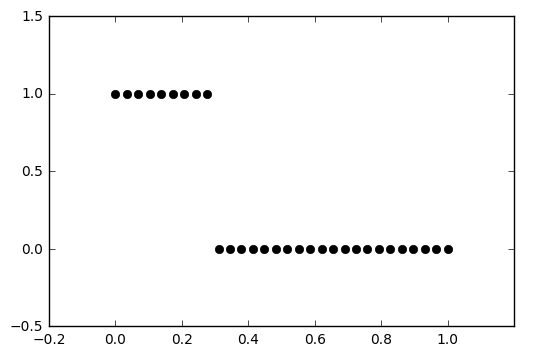

In [4]:
X = np.linspace(a, b, n)

p = 0
f_t = f(theta, a, b)

Y = [y(f_t, x, p) for x in X]
plt.plot(X,Y, 'ok')
plt.axis([a-0.2, b+0.2, -0.5, 1.5])


### Uniform grid 1d : Adaptive sampling

In [5]:
theta_min, theta_max = a, b


## Noise

### Uniform grid 1d : Non adaptive sampling

[-0.2, 1.2, -0.5, 1.5]

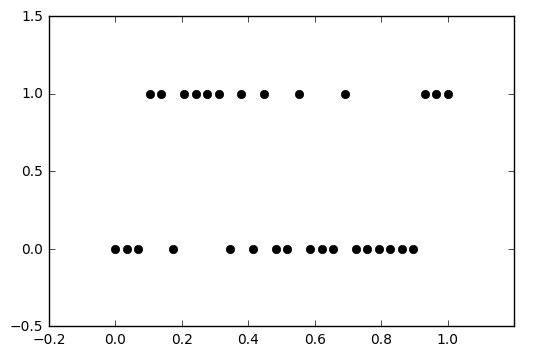

In [6]:
X = np.linspace(a, b, n)
p = 0.5
f_t = f(theta, a, b)

Y = [y(f_t, x, p) for x in X]
plt.plot(X,Y, 'ok')
plt.axis([a-0.2, b+0.2, -0.5, 1.5])


[-0.2, 1.2, -0.5, None]

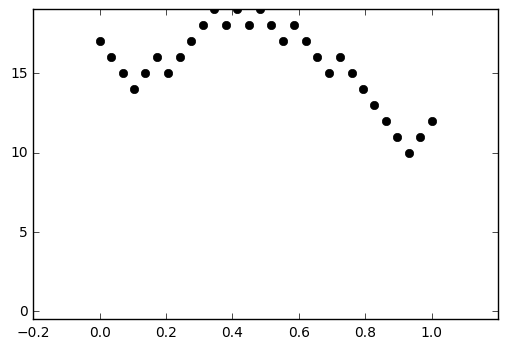

In [9]:
def S(X, Y, theta):
    S1 = np.sum(yi for xi, yi in zip(X,Y) if xi < theta)
    S2 = np.sum(1-yi for xi, yi in zip(X,Y) if xi >= theta)
    return S1+S2

Theta = np.linspace(a, b, n)
S_theta = [S(X, Y, theta) for theta in Theta]
plt.plot(Theta,S_theta, 'ok')
plt.axis([a-0.2, b+0.2, -0.5, None])